<h2>Logistic Regression Assignment</h2>
<p>Using fake advertising data set which indicates whether or not a particular internet user clicked on an advertisment. 
Create a model to predict whether or not a user will click on an ad based off the features of that particular user</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
#Add thick lines to bar plots. This was turned off by default in matplot 2.0
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
#A quick glance at the data. We have time spent on the site, age, area income, daily internet usage, location info,
#gender, timestamp and clicked on ad (0 for no, 1 for yes)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
# Looks like roughly half the people clicked on the ad. Just under half are male. Average age is 36.
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<h2>Exploratory Data Analysis</h2>
<p> Creating a series of various graphs to get a overall view of the data</p>

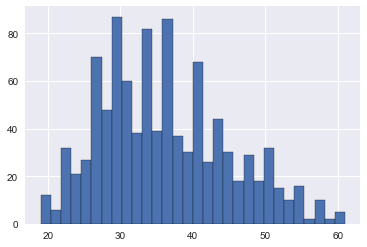

In [6]:
# Histogram plot of Age. 
ad_data['Age'].hist(bins=30)

<p>** Nothing much useful there, the age of the users seems to loosly fit what you would expect from general internet users to be with a slight skew to 30-40 year olds. **</p> 

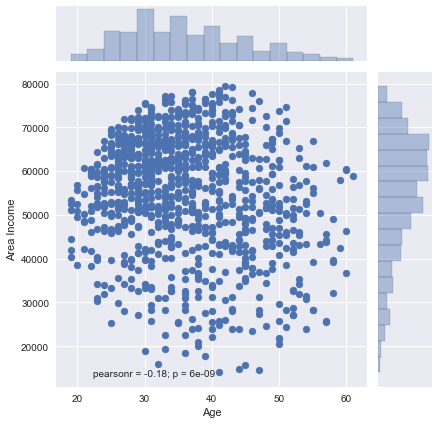

In [7]:
#Jointplot showing Area Income vs Age
sns.jointplot(x=ad_data['Age'], y=ad_data['Area Income'])

<p>** Looking at the pearson coefficient there isn't a relationship between age and and the income of the area. However there does appear to be some coalescing for the 30-40 crowd in a more wealthy neighbourhood. Perhaps a more expensive trendy neighbourhood**</p>

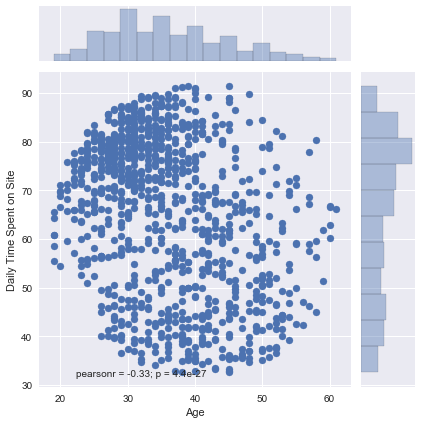

In [8]:
#Jointplot showing the kde distribution of Daily time spent vs Age. I will use a regular scatter plot first.
sns.jointplot(x=ad_data['Age'], y=ad_data['Daily Time Spent on Site'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


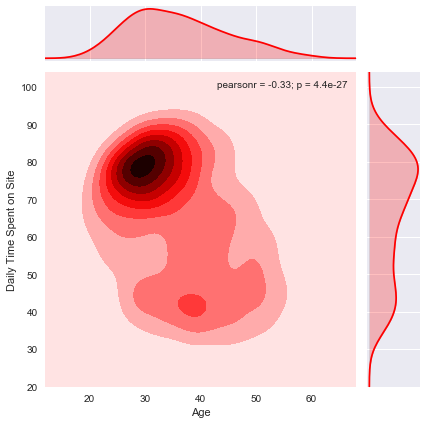

In [26]:
#I'll use a kernal density estimation to clear this graph up a bit.
sns.jointplot(x=ad_data['Age'], y=ad_data['Daily Time Spent on Site'], kind='kde', color='red')

<p>** Looks like if given more data we would expect to see the most active users are the early 30s and they will most likely spend 80min on the site **</p>

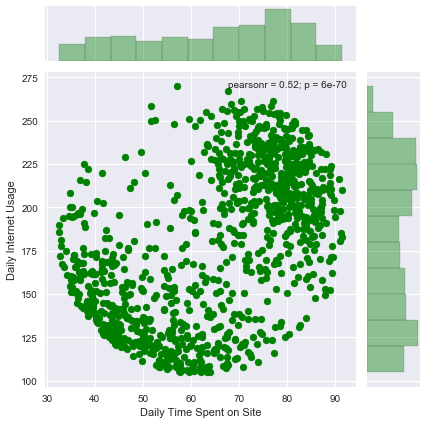

In [27]:
#Lets see if there is a relationship between how much time is spent online in general compared with how much time 
#on the site. 
sns.jointplot(x=ad_data['Daily Time Spent on Site'], y=ad_data['Daily Internet Usage'], color='green')

<p>** There doesn't appear to be any direct relationship besides at the two tails of being a low daily user and spending less time on the site as well as a high user and spending lots of time on the site **</p>

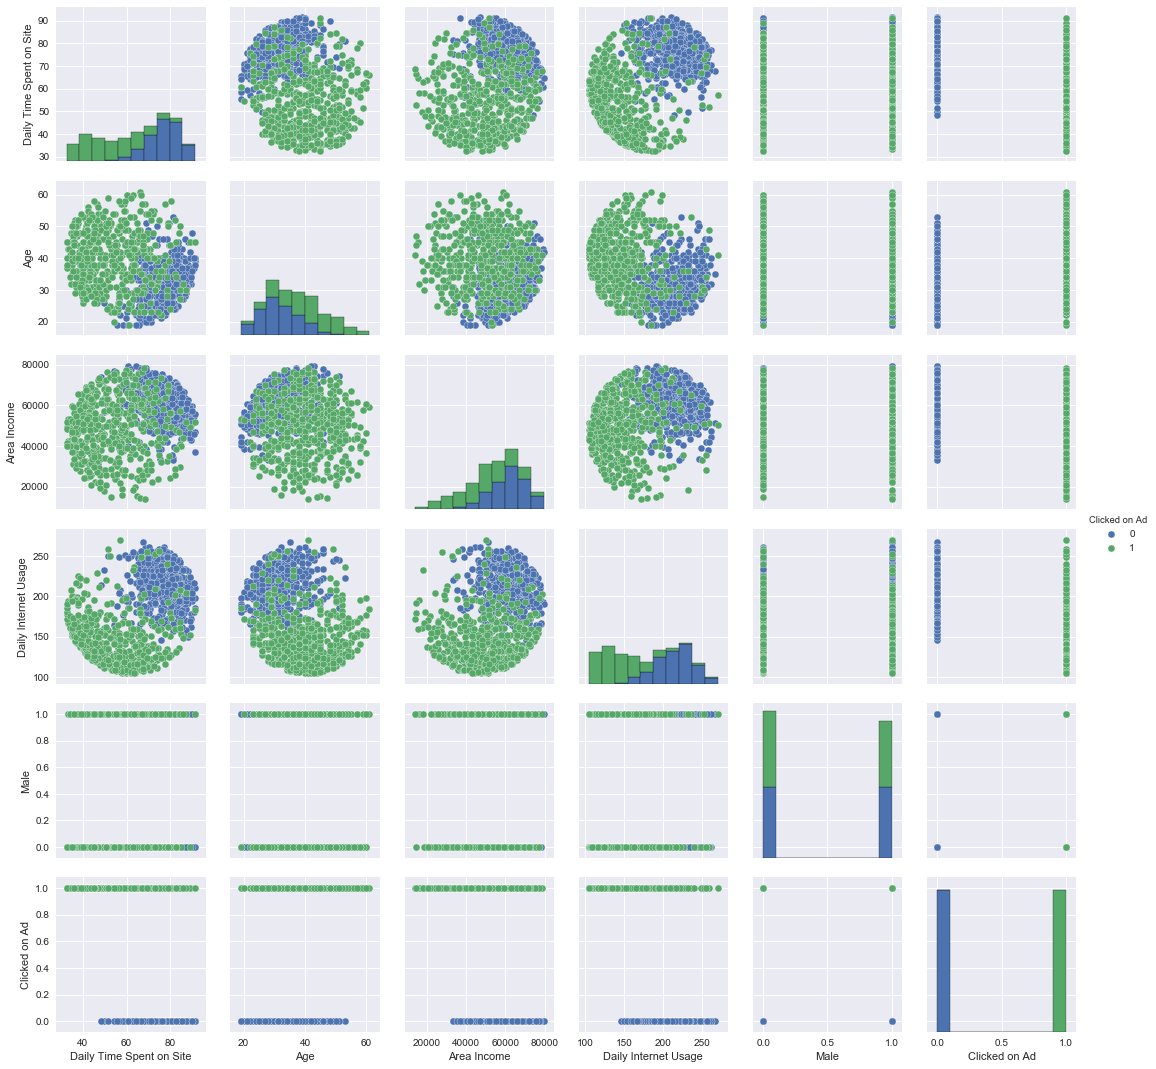

In [29]:
# Lets look at all the data, pairplot everything and differniate it by whether or not they clicked on an add
sns.pairplot(ad_data, hue='Clicked on Ad')

<p>** We see that age and area income are roughly normally distributed. Interesting to note though that it appears that no one below a certain area income clicked on the ad at all, same with a certain daily internet usage/time spent on site. Gender doesn't appear to have an effect on whether or not the ad was clicked on. **</p>

<h2> Logistic Regression </h2>


<p> At first pass at this I'm going to train the model on all the features then remove some and see if the prediction gets better or worse</p>

In [9]:
# What data should I not include as it would make predictions too difficult? Lets remove Ad Topic Line, City, Country
# and timestamp. Possibly attempt later to readd if I can think of a way to map the strings to some numerical value.
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [50]:
# Test/train split. Using the 'Clicked on Ad' as the response. A simple way to do this on one-line using pandas is to drop
# the column I want to test against when I add the features. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop(['Clicked on Ad', 'City', 'Country', 'Timestamp', 'Ad Topic Line'], axis=1),
                                                    ad_data['Clicked on Ad'], test_size=0.30,
                                                    random_state=101)

In [52]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
290,50.52,31,72270.88,171.62,0
167,86.06,31,53767.12,219.72,1
486,83.97,40,66291.67,158.42,1
683,76.83,28,67990.84,192.81,0
876,67.39,44,51257.26,107.19,0


In [53]:
# Training and prediciting
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
predictions = logmodel.predict(X_test)


In [56]:
#Evaluate current model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[149,   8],
       [ 15, 128]])

<p>** Current model has an accuracy of 92%.  8 False positives and 15 false negatives. Lets see if I can improve that with some feature engineering **</p>

<p>Lets include the time stamp data. I'll break the day into 8:00 - 16:00 (Category 1), 16:00 - 24:00 (Category 2), 00:00 - 8:00 (Category 3), and see if that improves the score at all</p>

In [38]:
def setCategoryForTime(datetime):
    hour = int(datetime.split(" ")[1].split(":")[0])
    if hour >= 0 and hour < 8:
        return 1
    elif hour >= 8 and hour < 16:
        return 2
    elif hour >= 16 and hour < 24:
        return 3

In [39]:
ad_data['Time Category'] = ad_data['Timestamp'].apply(setCategoryForTime)
ad_data['Time Category'].value_counts()

3    345
1    334
2    321
Name: Time Category, dtype: int64

<p>** Most of the ads were clicked on between 16:00 and 24:00 **<p>


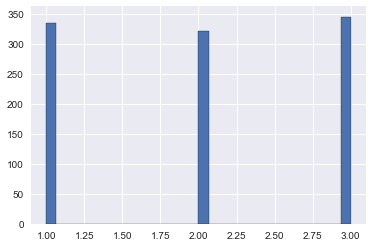

In [40]:
ad_data['Time Category'].hist(bins=30)

<p>** My guess is that this shouldn't effect the results that much since the 3 times seem to be evenly distributed ** </p>

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop(['Clicked on Ad', 'City', 'Country', 'Timestamp', 'Ad Topic Line'], axis=1),
                                                    ad_data['Clicked on Ad'], test_size=0.30,
                                                    random_state=101)

In [42]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Time Category
290,50.52,31,72270.88,171.62,0,2
167,86.06,31,53767.12,219.72,1,3
486,83.97,40,66291.67,158.42,1,2
683,76.83,28,67990.84,192.81,0,2
876,67.39,44,51257.26,107.19,0,2


In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) 
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.95      0.93       157
          1       0.94      0.89      0.91       143

avg / total       0.92      0.92      0.92       300



<p>** No change, same average total. Lets look at the coefficients of the model **</p>

In [57]:
logmodel.coef_

array([[ -4.95146805e-02,   2.19359929e-01,  -6.73395933e-06,
         -2.33980043e-02,   1.11192174e-03,   1.70576228e-02]])

<p>** It appears as if the most valuable parameter is the Area Income **</p>